# 6_簡単な予測モデルの構築
- まずはシンプルな予測モデルを構築し、予測結果の精度判定を行います
- 今回は、前章にて性別と生死に関係がありそうなことがわかったため、この知見を用いた予測モデルを構築します

# （事前情報）ライブラリの説明：Scikit-learn

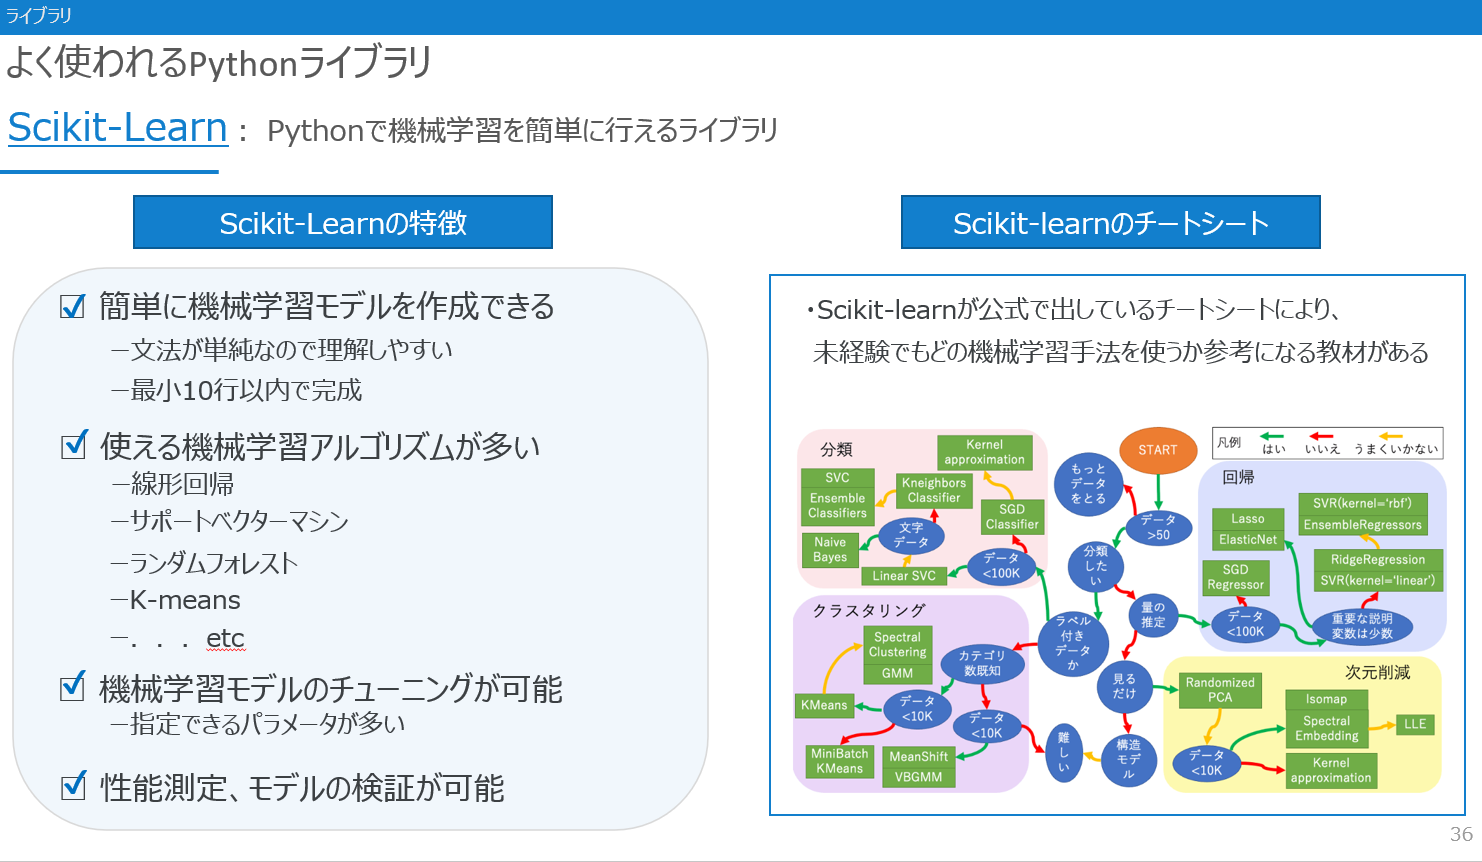

## ■写経

### ライブラリインストール
-予測モデルの構築のために使うscikit-learnをインストールします

In [3]:
!pip install scikit-learn

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 660.6 kB/s eta 0:00:17
   ---------------------------------------- 0.1/10.6 MB 1.2 MB/s eta 0:00:09
    --------------------------------------- 0.2/10.6 MB 1.6 MB/s eta 0:00:07
   - -------------------------------------- 0.5/10.6 MB 2.4 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/10.6 MB 2.7 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/10.6 MB 2.7 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/10.6 MB 2.7 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/10.6 MB 2.8 MB/s eta 0:00:04
   ----- ---------------------------------- 1.4/10.6 MB 3.0 MB/s eta 0:00:04
   ----- ---------------------------------- 1.6/10.6 MB 3.1 MB/s eta 0:00:03
   ------ --------------------------------- 1.7/10.6 MB 3.1 MB/s eta 0:00:03
   ------- -------------------------------- 1.9/10.6 MB 3.1 MB/s eta 0:00:03
   -

### ライブラリインポート（PandasとSciPy）
- 表形式データを簡単に扱うためのPandasをプログラムにインポートします。インポートすることでPandasの機能が有効化されます
- また予測モデルの構築のためにsklearnをインポートします

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression

### データ読み込み（前章と同じ）
- Pandasの機能を使い、"train.csv"というデータをPythonコードで読み込み、Dataframeオブジェクトとして扱います

In [6]:
train = pd.read_csv("train.csv")

### データを見てみる（前章と同じ）
- head関数をつかって、先頭5行分のデータをダイジェスト表示します

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 前準備
- maleを0、femaleを1に置き換えた列を作成します

In [8]:
# 前回の続きで、Sexを数値に変換する（男性Maleを0、女性Femaleを1とする）
train['Sex_bi'] = train['Sex'].map({'male': 0, 'female': 1})

### 単回帰モデルで使用する特徴量と目的変数を定義し、欠損値処理をする
- 今回は性別（特徴量）が生死（目的変数）と関係するという仮説をたてています
- 今回は欠損値データを削除します

In [9]:
# 特徴量と目的変数定義
features = ["Sex_bi"]
target = "Survived"

# 欠損値処理
# 処理したい特徴量を指定して、欠損値がある行を削除する→データフレームを更新する
train = train.dropna(subset=features + [target])

# 特徴量と目的変数のデータを分割
X_train = train[features]
y_train = train[target]

### 単回帰モデルの作成と学習

In [12]:
# 空の予測モデルを作成
model = LinearRegression()
# 学習データを与えて学習
model.fit(X_train, y_train)

LinearRegression()

### テストデータに対する予測の実施
- 上記で学習したモデルに、テスト用のデータを予測させます

In [13]:
# 提出用テストデータを読み込みます（すなわち、学習したモデルの精度を測るための検証データセットです）
test = pd.read_csv('test.csv')

# 提出用データも同様に、'Sex'列を0、1に変換します
test['Sex_bi'] = test['Sex'].map({'male': 0, 'female': 1})

# 提出用データの特徴量を分割します
X_test = test[features]

# 提出用データに対する予測を行います
predictions = model.predict(X_test)

predictions

array([0.18890815, 0.74203822, 0.18890815, 0.18890815, 0.74203822,
       0.18890815, 0.74203822, 0.18890815, 0.74203822, 0.18890815,
       0.18890815, 0.18890815, 0.74203822, 0.18890815, 0.74203822,
       0.74203822, 0.18890815, 0.18890815, 0.74203822, 0.74203822,
       0.18890815, 0.18890815, 0.74203822, 0.18890815, 0.74203822,
       0.18890815, 0.74203822, 0.18890815, 0.18890815, 0.18890815,
       0.18890815, 0.18890815, 0.74203822, 0.74203822, 0.18890815,
       0.18890815, 0.74203822, 0.74203822, 0.18890815, 0.18890815,
       0.18890815, 0.18890815, 0.18890815, 0.74203822, 0.74203822,
       0.18890815, 0.18890815, 0.18890815, 0.74203822, 0.74203822,
       0.18890815, 0.18890815, 0.74203822, 0.74203822, 0.18890815,
       0.18890815, 0.18890815, 0.18890815, 0.18890815, 0.74203822,
       0.18890815, 0.18890815, 0.18890815, 0.74203822, 0.18890815,
       0.74203822, 0.74203822, 0.18890815, 0.18890815, 0.74203822,
       0.74203822, 0.18890815, 0.74203822, 0.18890815, 0.74203

↑予測結果は0（dead）か1（survived）の2値である必要があるため、変換が必要。ここでは四捨五入をする

In [15]:
# predictionsの各データを四捨五入してpredictionsに再代入する
predictions = [round(pred) for pred in predictions]

predictions

[0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,


### 提出用データの作成
- 提出データは、passenger id, Survivedという2列のデータ形式とします
- データをcsv形式で出力します

In [16]:
# 提出用のDataFrameを作成します
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions})

# 提出用のcsvファイルを作成します
submission.to_csv('submission.csv', index=False)

### 答え合わせ
- この問題は、世界的なAIコンペサイトであるKaggleの練習問題コンペになっています
- そこでKaggleに上記の結果を提出して、スコア（予測精度）を確認しましょう
- https://www.kaggle.com/competitions/titanic/overview